# Lecture 11: Computing Persistent Homology


## Imports 

This tutorial will be built on teaching software I wrote to understand the standard persistence algorithm in a way that we can see the boundary matrices. *Warning: This is not fast, optimized, or otherwise recommended for use in any real applications so don't judge me.* You need to download the file [TeachingPersistence.py](./TeachingPersistence.py) and save it to the same folder as this jupyter notebook in order to run. 

In [1]:
import TeachingPersistence as Pers

# Standard imports 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## The Persistence Algorithm

As discussed last class, the persistence algorithm is given by the following. We have a function on a simplicial complex $f:K \to \mathbb{R}$. Then we choose a compatible ordering of the simplices and built a matrix $B$ giving the boundary information for a simplicial complex, with columns sorted in order of the filtration. 

- Let $low(j)$ be the row index of the lowest one in column $j$.
- If column $j$ is entirely 0, $low(j)$ is $-1$. *(Note: it was `NaN` in the previous slides)*
- $R$ is ``reduced'' if $low(j) \neq low(j')$ for any $j \neq j'$ which are not entirely zero columns.

Then the reduction algorithm is:

$$
\begin{aligned}
& R = B \\
& \text{For } j = 1, \ldots, m: \\
& \quad \text{While there exists } j' < j \text{ with } low(j') = low(j): \\
& \qquad \text{Add column } j' \text{ to column } j
\end{aligned}
$$

Say we have a pair $(\sigma,\tau)$, where $\tau$ is the row entry for the lowest one in $\sigma$'s column. If $\sigma$ is a $p$-simplex, and $\tau$ is a $(p+1)$-simplex, then we know that a $p$-dimensional class was born with the addition of simplex $\sigma$ and dies with the addition of simplex $\tau$. In the $p$-dimensional persistence diagram, this means that we have a point in the diagram at $(f(\sigma),f(\tau))$.

## Lower Star Filtration 


Let's start with a simple example where we are doing the lower star filtration. By this I mean that if I tell you the function value for the vertices of some fixed simplicial complex $K$:

$$
f:V \to \mathbb{R}
$$

then I assume that every other simplex's function value is given by 

$$
f(\sigma) = \max\{ f(v) \mid v \in \sigma\}.
$$

Here's a simplicial complex 

<img src="https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_6.jpeg" width="300">

and below I have chosen a function on the vertices. 

In [2]:
# Vertex function values 
f = {0: 8, 1: 13, 2:27, 3: 31, 4:38, 5: 52, 6: 60}

I'll use this to make a Python function that will give me the filtration function value $f(\sigma)$ for all the simplices, not just the vertices. 

In [3]:
def f_val(sigma):
    return max([f[v] for v in sigma])

print(f"Example, f([0,1,5]) = {f_val([0,1,5])}")

Example, f([0,1,5]) = 52


To store the simplicial complex, I can just list off all the simplices in the complex, order doesn't matter for the moment. 

In [4]:
# List of simplices 
S = [[0], [1], [2], [3], [4], [5], [6],
     [0,1], [1,2], [2,3], [3,4], [4,5], [0,5], 
     [1,5], [3,5], [2,6], [3,6], [5,6], [1,6],
     [0,1,5],[3,4,5], [2,3,6], [1,5,6], [1,2,6], [3,5,6]]

First, I'm going to find a compatible ordering of my simplices. Internally, this is done using something called *colexicographic ordering*, which works because I'm doing a lower star filtration. In usual cases, you'd have to come up with a compatible ordering depending on the type of filtration you're using.  

In [5]:
S = Pers.colex_order(S,f)

# Print out the simplices in the order I've now picked
for sigma in S:
    print('f(sigma):', max([f[v] for v in sigma]), '\tsigma:', sigma, )

f(sigma): 8 	sigma: [0]
f(sigma): 13 	sigma: [1]
f(sigma): 13 	sigma: [0, 1]
f(sigma): 27 	sigma: [2]
f(sigma): 27 	sigma: [1, 2]
f(sigma): 31 	sigma: [3]
f(sigma): 31 	sigma: [2, 3]
f(sigma): 38 	sigma: [4]
f(sigma): 38 	sigma: [3, 4]
f(sigma): 52 	sigma: [5]
f(sigma): 52 	sigma: [0, 5]
f(sigma): 52 	sigma: [1, 5]
f(sigma): 52 	sigma: [0, 1, 5]
f(sigma): 52 	sigma: [3, 5]
f(sigma): 52 	sigma: [4, 5]
f(sigma): 52 	sigma: [3, 4, 5]
f(sigma): 60 	sigma: [6]
f(sigma): 60 	sigma: [1, 6]
f(sigma): 60 	sigma: [2, 6]
f(sigma): 60 	sigma: [1, 2, 6]
f(sigma): 60 	sigma: [3, 6]
f(sigma): 60 	sigma: [2, 3, 6]
f(sigma): 60 	sigma: [5, 6]
f(sigma): 60 	sigma: [1, 5, 6]
f(sigma): 60 	sigma: [3, 5, 6]


Next, I can get the boundary matrix:

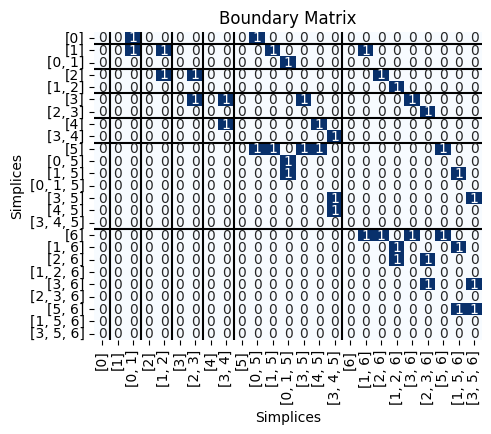

In [6]:
B = Pers.boundary(S)
Pers.drawMat(B, S)
plt.title('Boundary Matrix');

Next, we can get the reduced version of $B$.  

In [7]:
R,V,low = Pers.standard_persistence_reduction(B,return_type = 'V')

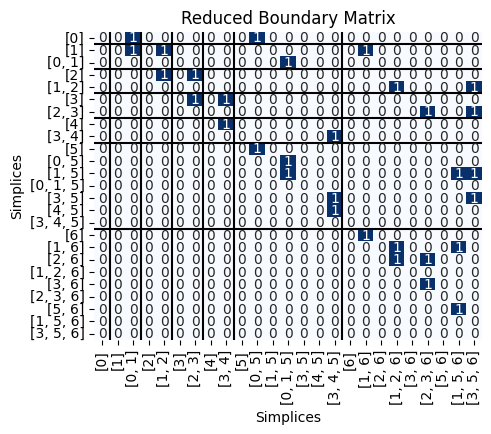

In [8]:
Pers.drawMat(R, S);

This code will also return the matrix $V$, where $R = BV$. We can double check that the result actually works. 

In [9]:
check = np.mod(R-B@V,2)
print('Check that R = BV:', np.all(check == 0))

Check that R = BV: True


This code also keeps track of the lowest 1's, which are exactly what we need for the points in the persistence diagram. Here's the `low` output from above, with the matrix drawn below. 

low: [-1 -1  1 -1  3 -1  5 -1  7 -1  9 -1 11 -1 -1 14 -1 16 -1 18 -1 20 -1 22
 13]


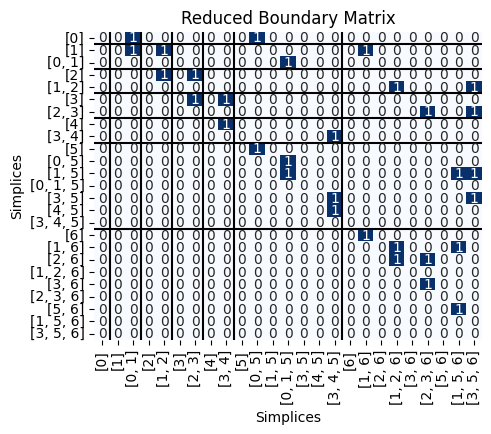

In [10]:
print('low:', low)
Pers.drawMat(R, S);

For interpretation, `-1` means there is no lowest one, so the column is empty. So we have the following interpretation. 

In [11]:
for i in range(len(S)):
    if low[i] != -1:
        print(f'Simplex {S[i]} is negative, kills the feature born at {S[low[i]]}')
    else:
        print(f'Simplex {S[i]} is positive, creates a new feature.')

Simplex [0] is positive, creates a new feature.
Simplex [1] is positive, creates a new feature.
Simplex [0, 1] is negative, kills the feature born at [1]
Simplex [2] is positive, creates a new feature.
Simplex [1, 2] is negative, kills the feature born at [2]
Simplex [3] is positive, creates a new feature.
Simplex [2, 3] is negative, kills the feature born at [3]
Simplex [4] is positive, creates a new feature.
Simplex [3, 4] is negative, kills the feature born at [4]
Simplex [5] is positive, creates a new feature.
Simplex [0, 5] is negative, kills the feature born at [5]
Simplex [1, 5] is positive, creates a new feature.
Simplex [0, 1, 5] is negative, kills the feature born at [1, 5]
Simplex [3, 5] is positive, creates a new feature.
Simplex [4, 5] is positive, creates a new feature.
Simplex [3, 4, 5] is negative, kills the feature born at [4, 5]
Simplex [6] is positive, creates a new feature.
Simplex [1, 6] is negative, kills the feature born at [6]
Simplex [2, 6] is positive, creates

Pairing these off, we have the following: 

In [12]:
pairs = []
for i in range(len(S)):
    if low[i] != -1:
        pairs.append((S[low[i]], S[i]))
    else:
        if i not in low:
            pairs.append((S[i], None))

for p in pairs:
    print(p)

([0], None)
([1], [0, 1])
([2], [1, 2])
([3], [2, 3])
([4], [3, 4])
([5], [0, 5])
([1, 5], [0, 1, 5])
([4, 5], [3, 4, 5])
([6], [1, 6])
([2, 6], [1, 2, 6])
([3, 6], [2, 3, 6])
([5, 6], [1, 5, 6])
([3, 5], [3, 5, 6])


This is actually also a function in the script so I can stop writing that function. 

In [13]:
pairs = Pers.get_pairs(low, S)
pairs

[([0], None),
 ([1], [0, 1]),
 ([2], [1, 2]),
 ([3], [2, 3]),
 ([4], [3, 4]),
 ([5], [0, 5]),
 ([1, 5], [0, 1, 5]),
 ([4, 5], [3, 4, 5]),
 ([6], [1, 6]),
 ([2, 6], [1, 2, 6]),
 ([3, 6], [2, 3, 6]),
 ([5, 6], [1, 5, 6]),
 ([3, 5], [3, 5, 6])]

Now if I want the actual persistence points, for each pair $(\sigma, \tau)$, we have a persistence point at $(f(\sigma), f(\tau))$ so long as those two values aren't equal. 

In [14]:
PersPoints = []
for p in pairs:
    if p[1] is not None and f_val(p[0]) != f_val(p[1]):
        print(f'Pair: ({f_val(p[0])}, {f_val(p[1])})')
        PersPoints.append((f_val(p[0]), f_val(p[1])))
    elif p[1] is None:
        print(f'Pair: ({f_val(p[0])}, infinity)')
        PersPoints.append((f_val(p[0]), np.inf))
    else: 
        print(f'Pair: ({f_val(p[0])}, {f_val(p[1])}) - ignored since same value')

Pair: (8, infinity)
Pair: (13, 13) - ignored since same value
Pair: (27, 27) - ignored since same value
Pair: (31, 31) - ignored since same value
Pair: (38, 38) - ignored since same value
Pair: (52, 52) - ignored since same value
Pair: (52, 52) - ignored since same value
Pair: (52, 52) - ignored since same value
Pair: (60, 60) - ignored since same value
Pair: (60, 60) - ignored since same value
Pair: (60, 60) - ignored since same value
Pair: (60, 60) - ignored since same value
Pair: (52, 60)


Again, I actually have this inside the script. 

In [15]:
Pers.get_pers_points(pairs, f_val)

[(8, inf), (52, 60)]

## Exercises

### Q1 
What happens if the function is different? Try computing the reduced matrix for the lower star filtration of these two functions:
1. `f_1 = {0: 1, 1: 3, 2:5, 3: 7, 4:9, 5: 11, 6: 13}`
2. `f_2 = {0: 8, 1: 13, 2: 27, 3: 31, 4: 38, 5: 52, 6: 15}`

- What changes (if any) occur in the simplex pairing? 
- What changes (if any) occur in the persistence diagram? 
- What changed in the function that caused (or didn't cause) differences? 
`

In [17]:
# Your code here

### Q2

Compute the 0- and 1-dimensional persistence diagram for the following simplicial complex filtration.  

![Filtration example 2](https://raw.githubusercontent.com/lizliz/CMSE890-TDA-Fall2025/main/JupyterFigures/SimplexExamples_Filtration2_horiz-web.png)

Note that this is not a lower star filtration, so you'll just have to make a list `S_new` of the simplces that is already sorted in the right order. 

In [18]:
# Your code here